## Observations and Insights 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data = pd.merge(mouse_metadata,study_results,how = 'left', on = 'Mouse ID' )
# Display the data table for preview

mouse_study_data.head(25)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [6]:
# Checking the number of mice.

mice = len(mouse_study_data['Mouse ID'].unique())

print(f'The number of mice is {mice}.')

The number of mice is 249.


In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

counts_mouse_data = mouse_study_data['Mouse ID'].value_counts()

duplicate_mouse_data = counts_mouse_data.loc[counts_mouse_data > 10]

duplicate_mouse_data

g989    13
Name: Mouse ID, dtype: int64

In [10]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_data_g989 = mouse_study_data.loc[mouse_study_data['Mouse ID'] == 'g989']

mouse_study_data_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data = mouse_study_data.loc[mouse_study_data['Mouse ID'] != 'g989']

clean_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [10]:
# Checking the number of mice in the clean DataFrame.
print(f'The number of mice in the clean dataframe is {len(clean_mouse_data)}.')

The number of mice in the clean dataframe is 1880.


## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mouse_data = clean_mouse_data.groupby('Drug Regimen')
mean_tumorvol = regimen_mouse_data['Tumor Volume (mm3)'].mean()
var_tumorvol = regimen_mouse_data['Tumor Volume (mm3)'].var()
std_tumorvol = regimen_mouse_data['Tumor Volume (mm3)'].std()
sem_tumorvol = regimen_mouse_data['Tumor Volume (mm3)'].sem()

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

tumor_volume_summary = pd.DataFrame({'Mean': mean_tumorvol, 'Variance': var_tumorvol, 'Standard Deviation': std_tumorvol,
                                    'Standard Error': sem_tumorvol})

tumor_volume_summary

,Mean,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,
Capomulin,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,61.168083,7.821003,0.581331
Propriva,52.320930,43.852013,6.622085,0.544332
Ramicane,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,59.450562,7.710419,0.573111


In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_volume_summary.describe()
# Using the aggregation method, produce the same summary statistics in a single line
tumor_volume_summary.aggregate('mean')

Mean                  50.975982
Variance              47.858440
Standard Deviation     6.821103
Standard Error         0.502785
dtype: float64

## Bar and Pie Charts

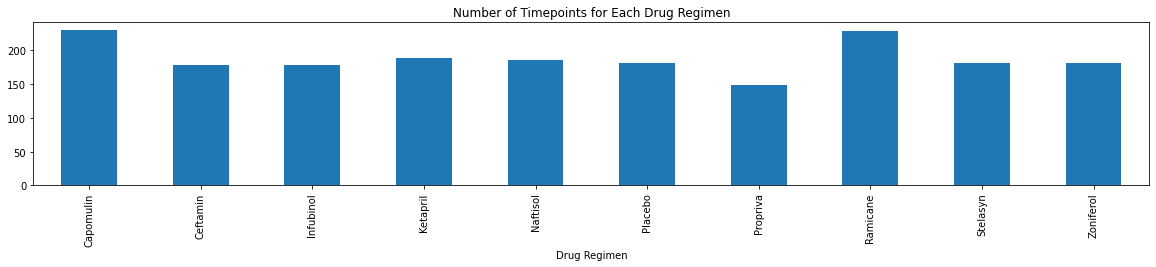

<Figure size 432x288 with 0 Axes>

In [14]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

num_timepoint_per_regiment  = regimen_mouse_data['Timepoint'].count()


num_timepoint_per_regiment.plot(kind="bar", figsize=(20,3))
plt.title("Number of Timepoints for Each Drug Regimen")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Number of Timepoints')

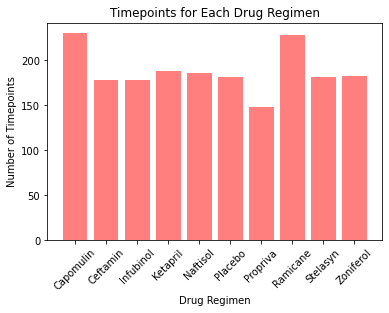

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = np.arange(len(num_timepoint_per_regiment))

plt.bar(x_axis, num_timepoint_per_regiment, color='r', alpha=0.5, align="center")

plt.xticks(x_axis, num_timepoint_per_regiment.index, rotation = 45)

plt.title("Timepoints for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")

<AxesSubplot:ylabel='Sex'>

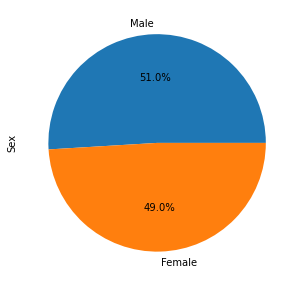

In [143]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_data_gender = clean_mouse_data['Sex'].unique()

male_mouse_data = clean_mouse_data.loc[clean_mouse_data['Sex'] == 'Male']
female_mouse_data = clean_mouse_data.loc[clean_mouse_data['Sex'] == 'Female']

Percent_male = len(male_mouse_data)/len(clean_mouse_data)
Percent_female = len(female_mouse_data)/len(clean_mouse_data)

labels = mouse_data_gender

gender_percent = [Percent_male,Percent_female]

gender_df = pd.DataFrame({'Gender': mouse_data_gender,'Gender Distribution': gender_percent})
 
clean_mouse_data['Sex'].value_counts().plot(kind="pie", figsize=(5,5),autopct="%1.1f%%")

Text(0.5, 1.0, 'Gender Distribution of Mice')

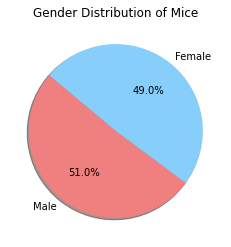

In [126]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_data_gender = clean_mouse_data['Sex'].unique()

male_mouse_data = clean_mouse_data.loc[clean_mouse_data['Sex'] == 'Male']
female_mouse_data = clean_mouse_data.loc[clean_mouse_data['Sex'] == 'Female']

Percent_male = len(male_mouse_data)/len(clean_mouse_data)
Percent_female = len(female_mouse_data)/len(clean_mouse_data)

labels = mouse_data_gender

gender_percent = [Percent_male,Percent_female]

colors = ["lightcoral", "lightskyblue"]

plt.pie(gender_percent, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.title('Gender Distribution of Mice')


## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
capomulin_mouse_data = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']
capomulin_latest_timepoint = capomulin_mouse_data.groupby('Mouse ID')['Timepoint'].max()

ramicane_mouse_data = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Ramicane']
ramicane_latest_timepoint = ramicane_mouse_data.groupby('Mouse ID')['Timepoint'].max()

infubinol_mouse_data = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Infubinol']
infubinol_latest_timepoint = infubinol_mouse_data.groupby('Mouse ID')['Timepoint'].max()

ceftamin_mouse_data = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Ceftamin']
ceftamin_latest_timepoint = ceftamin_mouse_data.groupby('Mouse ID')['Timepoint'].max()

latest_mouse_data = capomulin_latest_timepoint
latest_mouse_data = latest_mouse_data.append(ramicane_latest_timepoint)
latest_mouse_data = latest_mouse_data.append(infubinol_latest_timepoint)
latest_mouse_data = latest_mouse_data.append(ceftamin_latest_timepoint)

mouse_latest_timepoint_data = pd.merge(latest_mouse_data,clean_mouse_data,on = 'Mouse ID')

mouse_latest_timepoint_data_revised = mouse_latest_timepoint_data.loc[mouse_latest_timepoint_data['Timepoint_x'] == mouse_latest_timepoint_data['Timepoint_y']]
mouse_latest_timepoint_data_revised = mouse_latest_timepoint_data_revised.drop('Timepoint_y', axis = 1)

mouse_latest_timepoint_data_revised = mouse_latest_timepoint_data_revised.rename(columns = {'Timepoint_x':'Latest Timepoint'})

mouse_latest_timepoint_data_revised

,Mouse ID,Latest Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
9,b128,45,Capomulin,Female,9,22,38.982878,2
19,b742,45,Capomulin,Male,7,21,38.939633,0
24,f966,20,Capomulin,Male,16,17,30.485985,0
34,g288,45,Capomulin,Male,3,19,37.074024,1
44,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
773,x226,0,Ceftamin,Male,23,28,45.000000,0
783,x581,45,Ceftamin,Female,19,28,64.634949,3
793,x822,45,Ceftamin,Male,3,29,61.386660,3
803,y769,45,Ceftamin,Female,6,27,68.594745,4


In [90]:
# Put treatments into a list for for loop (and later for plot labels)

drug_treatments = mouse_latest_timepoint_data_revised['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
mouse_latest_timepoint_data_revised = mouse_latest_timepoint_data_revised.dropna()
tumor_vol_data = pd.DataFrame({'Drug Regimen': mouse_latest_timepoint_data_revised['Drug Regimen'],
                               'Tumor Volume (mm3)': mouse_latest_timepoint_data_revised['Tumor Volume (mm3)']})
    
    # add subset 
    
tumor_vol_data_Capomulin = tumor_vol_data.loc[tumor_vol_data['Drug Regimen'] == 'Capomulin']
tumor_vol_data_Ceftamin = tumor_vol_data.loc[tumor_vol_data['Drug Regimen'] == 'Ceftamin']
tumor_vol_data_Infubinol = tumor_vol_data.loc[tumor_vol_data['Drug Regimen'] == 'Infubinol']
tumor_vol_data_Ramicane = tumor_vol_data.loc[tumor_vol_data['Drug Regimen'] == 'Ramicane']

tumor_vol_data_byreg = tumor_vol_data.groupby(['Drug Regimen'])

    # Determine outliers using upper and lower bounds
all_quartiles =  tumor_vol_data_byreg.quantile([.25,.5,.75])  

Capomulin_quartiles = tumor_vol_data_Capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75]) 
Capomulin_lowerq = Capomulin_quartiles[.25]
Capomulin_upperq = Capomulin_quartiles[.75]
Capomulin_iqr = Capomulin_upperq - Capomulin_lowerq
Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)

tumor_vol_outliers_Capomulin = tumor_vol_data_Capomulin.loc[(tumor_vol_data_Capomulin['Tumor Volume (mm3)'] > Capomulin_upper_bound)
                                                           | (tumor_vol_data_Capomulin['Tumor Volume (mm3)'] < Capomulin_lower_bound)]


Ceftamin_quartiles = tumor_vol_data_Ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75]) 
Ceftamin_lowerq = Ceftamin_quartiles[.25]
Ceftamin_upperq = Ceftamin_quartiles[.75]
Ceftamin_iqr = Ceftamin_upperq - Ceftamin_lowerq
Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)

tumor_vol_outliers_Ceftamin = tumor_vol_data_Ceftamin.loc[(tumor_vol_data_Ceftamin['Tumor Volume (mm3)'] > Ceftamin_upper_bound)
                                                           | (tumor_vol_data_Ceftamin['Tumor Volume (mm3)'] < Ceftamin_lower_bound)]


Infubinol_quartiles = tumor_vol_data_Infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75]) 
Infubinol_lowerq = Infubinol_quartiles[.25]
Infubinol_upperq = Infubinol_quartiles[.75]
Infubinol_iqr = Infubinol_upperq - Infubinol_lowerq
Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)

tumor_vol_outliers_Infubinol = tumor_vol_data_Infubinol.loc[(tumor_vol_data_Infubinol['Tumor Volume (mm3)'] > Infubinol_upper_bound)
                                                           | (tumor_vol_data_Infubinol['Tumor Volume (mm3)'] < Infubinol_lower_bound)]


Ramicane_quartiles = tumor_vol_data_Ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75]) 
Ramicane_lowerq = Ramicane_quartiles[.25]
Ramicane_upperq = Ramicane_quartiles[.75]
Ramicane_iqr = Ramicane_upperq - Ramicane_lowerq
Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)

tumor_vol_outliers_Ramicane = tumor_vol_data_Ramicane.loc[(tumor_vol_data_Ramicane['Tumor Volume (mm3)'] > Ramicane_upper_bound)
                                                           | (tumor_vol_data_Ramicane['Tumor Volume (mm3)'] < Ramicane_lower_bound)]

total_outliers = tumor_vol_outliers_Capomulin
total_outliers = total_outliers.append(tumor_vol_outliers_Ceftamin)
total_outliers = total_outliers.append(tumor_vol_outliers_Infubinol)
total_outliers = total_outliers.append(tumor_vol_outliers_Ramicane)
total_outliers

,Drug Regimen,Tumor Volume (mm3)
506,Infubinol,36.321346


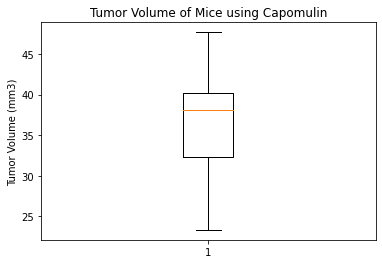

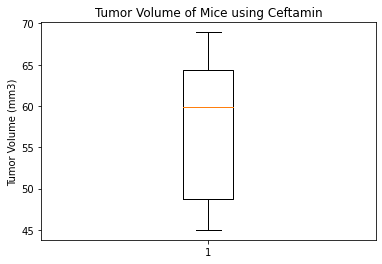

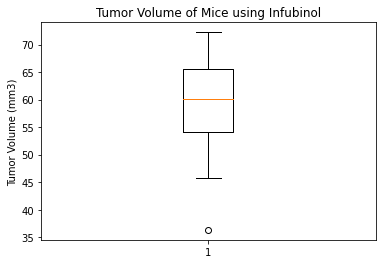

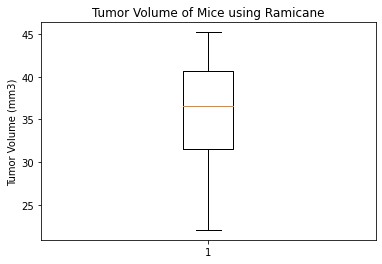

In [99]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of Mice using Capomulin')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_data_Capomulin['Tumor Volume (mm3)'])
plt.show()

fig1, ax2 = plt.subplots()
ax2.set_title('Tumor Volume of Mice using Ceftamin')
ax2.set_ylabel('Tumor Volume (mm3)')
ax2.boxplot(tumor_vol_data_Ceftamin['Tumor Volume (mm3)'])
plt.show()

fig1, ax3 = plt.subplots()
ax3.set_title('Tumor Volume of Mice using Infubinol')
ax3.set_ylabel('Tumor Volume (mm3)')
ax3.boxplot(tumor_vol_data_Infubinol['Tumor Volume (mm3)'])
plt.show()

fig1, ax4 = plt.subplots()
ax4.set_title('Tumor Volume of Mice using Ramicane')
ax4.set_ylabel('Tumor Volume (mm3)')
ax4.boxplot(tumor_vol_data_Ramicane['Tumor Volume (mm3)'])
plt.show()

## Line and Scatter Plots

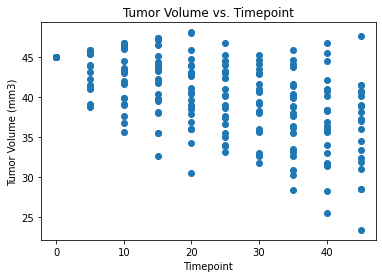

In [30]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
x_values = capomulin_mouse_data['Timepoint']
y_values = capomulin_mouse_data['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Timepoint')
plt.show()

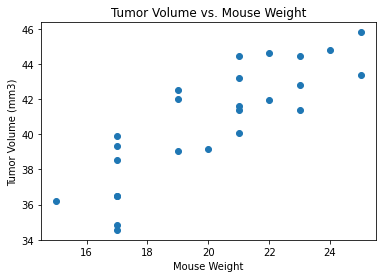

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_mouse_data_group = capomulin_mouse_data.groupby(['Mouse ID'])
average_tumor_volume_capomulin = capomulin_mouse_data_group['Tumor Volume (mm3)'].mean()
mouse_weight_capomulin = capomulin_mouse_data_group['Weight (g)'].mean()

x_values = mouse_weight_capomulin
y_values = average_tumor_volume_capomulin
plt.scatter(x_values,y_values)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Mouse Weight')
plt.show()

## Correlation and Regression

The r-value is: 0.84


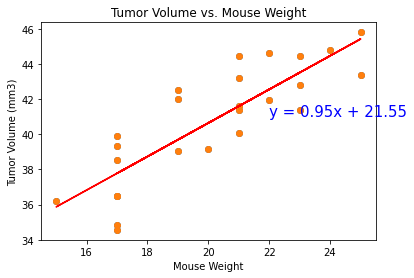

In [40]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

plt.scatter(x_values,y_values)
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Mouse Weight')
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22,41),fontsize=15,color="blue")

print(f"The r-value is: {round(rvalue,2)}")
plt.show()